**This requires > the standard 2GB of memory in docker. It worked with 3.5GB, but less may be possible.**

In [1]:
import pandas as pd
from ebmdatalab import bq
from lib.outliers import *

In [2]:
with open("../data/static_outlier_sql/chem_per_para.sql") as sql:
    query = sql.read()
#chem_per_para = bq.cached_read(query, csv_path='data/chem_per_para.zip')

## reload specifying data type currently required
## due to https://github.com/ebmdatalab/datalab-pandas/issues/26
chem_per_para = pd.read_csv('../data/chem_per_para.zip',dtype={'subpara': str})
chem_per_para.head()

,practice,pcn,ccg,chemical,subpara,numerator
0,C83009,U58704,04D,1001040C0,1001040,712
1,H81069,U67032,10C,0601021M0,0601021,406
2,M83096,U91937,05G,0307000J0,0307000,302
3,A83030,U01989,00J,0202020D0,0202020,148
4,N81117,U85986,02F,0906026M0,0906026,235


In [3]:
## WHAT TO DO WHERE DENOMINATOR == 0?

In [4]:
stats_class = StaticOutlierStats(
    df=chem_per_para,
    entity_type='ccg',
    num_code='chemical',
    denom_code='subpara'
)
stats = stats_class.get_table()
stats.head()

subpara  numerator                             chemical_name  \
ccg chemical                                                                  
00C 0101010G0  0101010        320  Co-Magaldrox(Magnesium/Aluminium Hydrox)   
    0101010J0  0101010          5                     Magnesium Trisilicate   
    0101010L0  0101010          1    Aluminium & Magnesium & Act Simeticone   
    0101010N0  0101010          4        Aluminium & Magnesium & Oxetacaine   
    0101010R0  0101010          4                                Simeticone   

                          subpara_name  denominator     ratio      mean  \
ccg chemical                                                              
00C 0101010G0  Antacids and Simeticone          334  0.958084  0.404554   
    0101010J0  Antacids and Simeticone          334  0.014970  0.037383   
    0101010L0  Antacids and Simeticone          334  0.002994  0.145461   
    0101010N0  Antacids and Simeticone          334  0.011976  0.025471   
    0101010R0  Antacids and Simeticone          334  0.011976  0.239338   

                    std   z_score  
ccg chemical                       
00C 0101010G0  0.197248  2.806267  
    0101010J0  0.037562 -0.596704  
    0101010L0  0.091317 -1.560133  
    0101010N0  0.036019 -0.374656  
    0101010R0  0.118575 -1.917449

,Chemical Items,BNF Subparagraph,Subparagraph Items,ratio,mean,std,z_score,plots
BNF Chemical,,,,,,,,
Ertugliflozin,76,Other Antidiabetic Drugs,13814,0.01,0.00,0.00,13.71,
Erythromycin,1,Antibacterials,1129,0.00,0.00,0.00,11.57,
Oxprenolol Hydrochloride,1,Beta-Adrenoceptor Blocking Drugs,55059,0.00,0.00,0.00,10.85,
Dibrompropamidine Isetionate,3,Antibacterials,1129,0.00,0.00,0.00,10.20,
Deflazacort,51,Use of Corticosteroids,10001,0.01,0.00,0.00,7.08,
Benzocaine,15,Drugs For Oral Ulceration & Inflammation,558,0.03,0.00,0.00,6.62,
Co-Flumactone (Hydroflumeth/Spironol),7,Potassium Sparing Diuretics & Compounds,325,0.02,0.00,0.00,6.61,
Empagliflozin/Linagliptin,8,Other Antidiabetic Drugs,13814,0.00,0.00,0.00,6.35,
Benzbromarone,7,Gout & Cytotoxic Induced Hyperiuicaemia,9905,0.00,0.00,0.00,6.04,

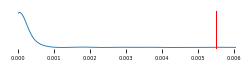
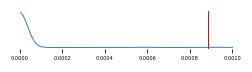
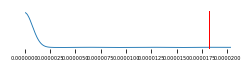
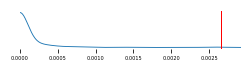
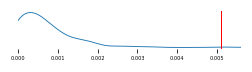
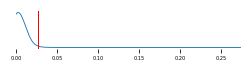
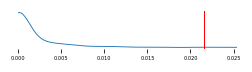
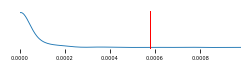
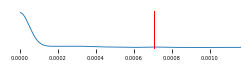
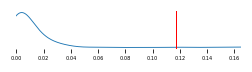

In [5]:
dist_table(
    stats,
    stats_class,
    '00C',
)

In [6]:
stats.loc[stats['z_score']>100000000000]

,,subpara,numerator,chemical_name,subpara_name,denominator,ratio,mean,std,z_score
ccg,chemical,,,,,,,,,


In [8]:
from tqdm.notebook import tqdm
from lib.make_html import write_to_template

for x in ['ccg','pcn','practice']:
    entity_names = entity_names_query(x)
    stats_class = StaticOutlierStats(
        df=chem_per_para,
        entity_type=x,
        num_code='chemical',
        denom_code='subpara'
    )
    stats = stats_class.get_table()
    codes = stats.index.get_level_values(0).unique()[0:10]
    
    for code in tqdm(codes, desc=x):
        table_high = dist_table(
            stats,
            stats_class,
            code,
            ascending=False,
            table_length=5,
        )
        table_low = dist_table(
            stats,
            stats_class,
            code,
            ascending=True,
            table_length=5,
        )
        output_file = f'static_{x}_{code}'
        write_to_template(
            entity_names.loc[code,'name'],
            table_high,
            table_low,
            output_file,
        )